In [1]:
%load_ext autoreload
%autoreload 2

import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ib_insync import *
import os
import sys

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from optopus.ib_adapter import IBBrokerAdapter
from optopus.optopus import Optopus
from optopus.utils import to_df


%matplotlib inline

2018-09-24 17:50:58,697 — optopus — INFO — Completed configuring the logger


In [2]:
# port = 7497 TWS paper trading
util.startLoop()
opt = Optopus(IBBrokerAdapter(IB(), host='127.0.0.1', port=7497, client=7))
opt.start()

2018-09-24 17:52:40,881 — optopus.optopus — INFO — System started


INFO:optopus.optopus:System started


In [3]:
df = to_df(opt.assets().values())

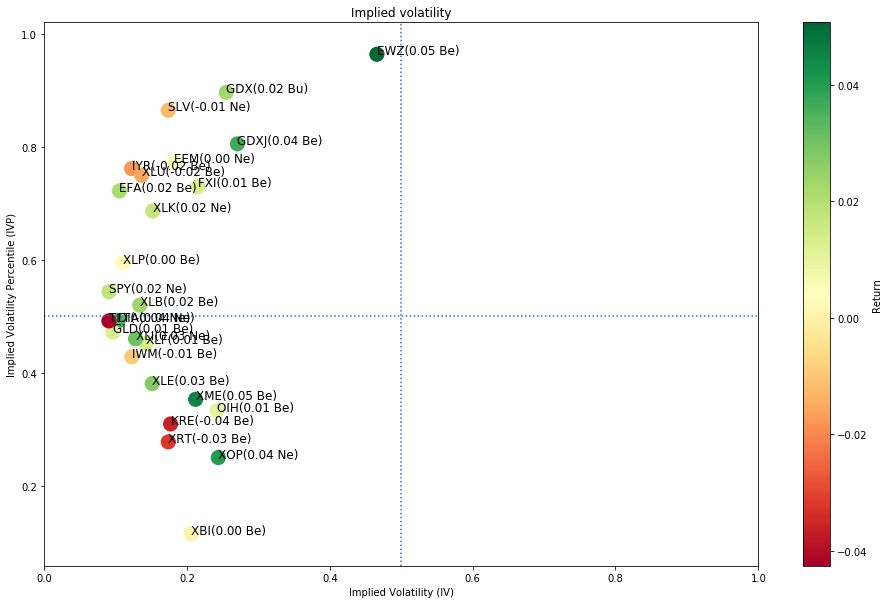

In [4]:
#ax = df.plot(kind='scatter', x='IV_h', y='IV_percentile_h', c='one_month_return', colormap='RdYlGn', s=200, figsize=(14,8))
plt.figure(figsize=(16, 10))
sc = plt.scatter(x=df['IV'].values, y=df['IV_percentile'].values, c=df['price_period'].values, cmap='RdYlGn', s=200)
plt.colorbar(sc).set_label('Return')
plt.title('Implied volatility')
plt.xlabel('Implied Volatility (IV)')
plt.ylabel('Implied Volatility Percentile (IVP)')
plt.xlim(0, 1)
plt.axvline(0.5, linestyle='dotted')
plt.axhline(0.5, linestyle='dotted')
for i, row in df.iterrows():
    label = row['code'] + '({0:.2f} {1})'.format(row['price_period'], row['directional_assumption'][0:2])
    plt.annotate(label, (row['IV'], row['IV_percentile']), fontsize=12, color='black')

In [5]:
df[['code', 'correlation']].sort_values(['correlation'], ascending=False).style.background_gradient(cmap='RdYlGn')

In [6]:
candidates = df[(df['IV'] > 0.2) & (df['IV_percentile'] > 0.75)]
candidates[['code', 'market_price','price_period', 'price_percentile','directional_assumption', 'IV', 'IV_period', 'IV_percentile']]

,code,market_price,price_period,price_percentile,directional_assumption,IV,IV_period,IV_percentile
3,EWZ,33.13,0.050745,0.186508,Bearish,0.465996,0.136117,0.964286
5,GDX,18.89,0.023294,0.099206,Bullish,0.255151,0.017343,0.896825
6,GDXJ,28.15,0.036832,0.107143,Bearish,0.270676,0.061442,0.805556


In [7]:
candidates

,IV,IV_percentile,IV_period,IV_rank,_contract,_historical_IV_updated,_historical_data_updated,_historical_updated,ask,ask_size,...,last,last_size,low,market_price,midpoint,price_percentile,price_period,stdev,time,volume
3,0.465996,0.964286,0.136117,0.664422,None,2018-09-24 17:51:40.954148,2018-09-24 17:51:40.954139,2018-09-24 17:51:02.963591,33.13,31,...,33.13,1,33.10,33.13,33.125,0.186508,0.050745,0.013061,2018-09-24 15:51:00.911272+00:00,100127
5,0.255151,0.896825,0.017343,0.098095,None,2018-09-24 17:51:41.837256,2018-09-24 17:51:41.837245,2018-09-24 17:51:03.879087,18.90,1722,...,18.89,3,18.83,18.89,18.895,0.099206,0.023294,0.009241,2018-09-24 15:51:00.910019+00:00,182128
6,0.270676,0.805556,0.061442,0.403371,None,2018-09-24 17:51:42.265004,2018-09-24 17:51:42.264993,2018-09-24 17:51:04.369635,28.16,257,...,28.15,1,28.04,28.15,28.155,0.107143,0.036832,0.012209,2018-09-24 15:51:00.909121+00:00,56175


In [8]:
candidates = candidates[candidates['volume'] > 1000]

In [9]:
candidates['code']

3     EWZ
5     GDX
6    GDXJ
Name: code, dtype: object

ERROR:ib_insync.client:Peer closed connection
